In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm

from library import regulations
from library import analysis
from library import tables

In [8]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.doi == True]
regs = data[regulations.mainless]
regs.head()

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,9,10,280) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_111,reg21_003,reg21_102,reg21_401,reg21_352,reg21_354,reg25_092,reg37_0012,reg25_036
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(regs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
df = pd.DataFrame(pca.components_, columns=list(regs.columns))
df

,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_111,reg21_003,reg21_102,reg21_401,reg21_352,reg21_354,reg25_092,reg37_0012,reg25_036
0,0.062842,0.445345,0.226721,0.352667,0.401742,0.163107,0.265963,0.225840,0.077913,0.149031,0.010100,0.446592,0.286306,0.049027
1,0.010960,-0.388453,-0.154211,-0.394731,0.225976,0.073615,0.253300,0.621254,0.130620,0.127454,0.050633,-0.169875,0.256275,0.179959
2,0.018040,-0.018816,-0.268483,-0.151709,-0.456363,-0.118822,0.112998,-0.195104,-0.192069,0.470366,0.165774,0.331956,0.478778,-0.077222
3,0.014586,0.361181,0.285367,0.070638,-0.568591,-0.307280,0.064334,0.368345,0.147278,-0.223628,-0.071808,-0.276032,0.230196,0.139058
4,0.011142,-0.436181,0.660419,-0.191277,-0.119897,-0.160576,0.238007,-0.072485,0.020236,-0.136774,0.077791,0.437460,-0.135203,0.001415
5,0.066837,0.136582,-0.087451,0.043741,-0.085645,-0.183138,0.405760,-0.051268,0.436322,0.475195,0.175582,-0.105483,-0.543869,0.072365
6,-0.040202,-0.370210,0.337478,0.480228,0.068405,-0.085791,-0.354249,-0.035778,0.094880,0.459940,0.088634,-0.301692,0.221682,0.097173
7,0.042975,0.213087,0.365301,-0.387096,0.110315,0.338271,0.232641,-0.425169,0.078340,0.093616,0.017927,-0.446024,0.268652,-0.147097
8,-0.086251,0.146836,0.020166,-0.344599,-0.023166,0.108447,-0.573600,-0.013631,0.633534,0.024333,0.104590,0.287855,0.057385,0.106282
9,0.037733,-0.308458,-0.262962,0.365209,-0.143892,0.214593,0.309937,-0.273024,0.492047,-0.382256,-0.021299,0.016939,0.265369,0.064452


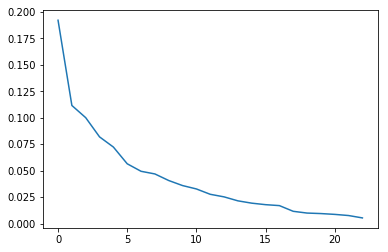

In [6]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)

In [7]:
pca = PCA(n_components=6)
pca.fit(regs)
X1=pca.fit_transform(regs)
X1 = pd.DataFrame(X1)
pca_data = X1.merge(data, left_index = True, right_index = True)
pca_data.columns
pca_data = pca_data.rename(columns = {0: 'PCA1', 1: 'PCA2', 2: 'PCA3', 3: 'PCA4', 4: 'PCA5', 5: 'PCA6'})
pca_data

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,Unnamed: 0,year,campus,campname,...,district_status,type_urban,type_suburban,type_town,type_rural,eligible,teachers_nodegree,teachers_badegree,teachers_msdegree,teachers_phddegree
3,0.907833,0.310248,-0.135855,0.155617,-0.248718,-0.847990,3,2012,109901001,ABBOTT SCHOOL,...,doi,0,0,0,1,1,NaN,NaN,NaN,NaN
4,0.907833,0.310248,-0.135855,0.155617,-0.248718,-0.847990,4,2012,95901003,ABERNATHY DAEP,...,doi,0,0,0,1,1,NaN,NaN,NaN,NaN
5,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,5,2012,95901101,ABERNATHY EL,...,doi,0,0,0,1,1,NaN,NaN,NaN,NaN
6,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,6,2012,95901001,ABERNATHY H S,...,doi,0,0,0,1,1,NaN,NaN,NaN,NaN
7,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,7,2012,95901041,ABERNATHY J H,...,doi,0,0,0,1,1,NaN,NaN,NaN,NaN
8,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,8,2012,221901001,ABILENE H S,...,doi,1,0,0,0,1,NaN,NaN,NaN,NaN
9,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,9,2012,221901010,ACADEMY FOR TECHNOLOGY ENGINEERING,...,doi,1,0,0,0,1,NaN,NaN,NaN,NaN
10,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,10,2012,221901142,ACADIA ABILENE BEHAVIORAL HEALTH,...,doi,1,0,0,0,1,NaN,NaN,NaN,NaN
11,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,11,2012,221901102,AUSTIN EL,...,doi,1,0,0,0,1,NaN,NaN,NaN,NaN
12,-0.806846,0.217829,0.335214,-0.052261,-0.691377,0.121081,12,2012,221901153,BASSETTI EL,...,doi,1,0,0,0,1,NaN,NaN,NaN,NaN


# Predict PCAs

In [8]:
x_list = ['type_urban', 'type_suburban', 'type_town',  
           'teachers_tenure_ave', 'teachers_turnover_ratio', 'students_teacher_ratio',
           'students_hisp', 'students_black', 'students_frpl', 'avescores']

tables.ols_to_excel(pca_data, y = 'PCA1', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 2)
tables.ols_to_excel(pca_data, y = 'PCA2', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 3)
tables.ols_to_excel(pca_data, y = 'PCA3', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 4)
tables.ols_to_excel(pca_data, y = 'PCA4', x_list = x_list,  file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 5)
tables.ols_to_excel(pca_data, y = 'PCA5', x_list = x_list, file = table_path + 'reg_pcas.xlsx', start_row = 4, start_col = 6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PCA5   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9478
Date:                Sat, 20 Oct 2018   Prob (F-statistic):              0.488
Time:                        17:17:07   Log-Likelihood:                -2671.5
No. Observations:                3530   AIC:                             5363.
Df Residuals:                    3520   BIC:                             5425.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
type_urban                  0.0203      0.047      0.434      0.665      -0.071       0.112
type_suburban               0.0459      0.029      1.593      0.111      -0.011       0.102
type_town                   0.0036      0.024      0.152      0.879      -0.043       0.050
teachers_tenure_ave         0.0021      0.004      0.479      0.632      -0.007       0.011
teachers_turnover_ratio    -0.0005      0.001     -0.457      0.648      -0.003       0.002
students_teacher_ratio     -0.0008      0.007     -0.118      0.906      -0.014       0.013
students_hisp               0.0649      0.048      1.340      0.180      -0.030       0.160
students_black              0.0202      0.098      0.206      0.837      -0.172       0.212
students_frpl              -0.0724      0.075     -0.968      0.333      -0.219       0.074
avescores                  -0.0190      0.018     -1.046      0.295      -0.055       0.017
==============================================================================
Omnibus:                       70.488   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.760
Skew:                           0.309   Prob(JB):                     7.90e-18
Kurtosis:                       3.392   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""